<a href="https://colab.research.google.com/github/son50git/Routine-with-Python/blob/master/StackedBar_v8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
def stackedBarCategories (rpt_name, roll_prd, SHOW_STATS):

  from google.colab import drive, files
  drive.mount("/content/drive")
  uploaded = files.upload()

  sheets = ["RD Cats", "Hist Days of Week(non-Adj)"]

  for sheet in sheets:

    cats_df = pd.read_excel(rpt_name, sheet_name=sheet)  

    if sheet=="Hist Days of Week(non-Adj)":
      cats_df = cats_df[['ART','SLP','ORD','LES','TRA','Rel','Ref','PHA','SPC']]
    else:
      cats_df["ART"] = cats_df.ART.rolling(roll_prd, min_periods=roll_prd).mean()
      cats_df["SLP"] = cats_df.SLP.rolling(roll_prd, min_periods=roll_prd).mean()
      cats_df["ORD"] = cats_df.ORD.rolling(roll_prd, min_periods=roll_prd).mean()
      cats_df["LES"] = cats_df.LES.rolling(roll_prd, min_periods=roll_prd).mean()
      cats_df["TRA"] = cats_df.TRA.rolling(roll_prd, min_periods=roll_prd).mean()
      cats_df["Rel"] = cats_df.Rel.rolling(roll_prd, min_periods=roll_prd).mean()
      cats_df["Ref"] = cats_df.Ref.rolling(roll_prd, min_periods=roll_prd).mean()
      cats_df["PHA"] = cats_df.PHA.rolling(roll_prd, min_periods=roll_prd).mean()
      cats_df["SPC"] = cats_df.SPC.rolling(roll_prd, min_periods=roll_prd).mean()
      cats_df = cats_df.tail(21)

      if SHOW_STATS == 1:
        cats_df.reset_index(inplace=True)
        cats_df.index = cats_df.index + 1
        cats_df2 = cats_df[['Date','Day','ORD','TRA','SPC','LES','SLP']]
        print()
        print(cats_df2.tail(7))
        cats_df1 = cats_df[['Date','Day','ART','Rel','Ref','PHA']]
        cats_df1["Pos_PCT"] = cats_df1.iloc[:, -4:-1].sum(axis=1) / 1440.00
        print()
        print(cats_df1.tail(7))

      tmp_2 = [i + j for i,j in zip(cats_df["ART"],cats_df["Rel"])]
      tmp_3 = [i + j for i,j in zip(tmp_2,cats_df["Ref"])]
      tmp_4 = [i + j for i,j in zip(tmp_3,cats_df["PHA"])]
      tmp_5 = [i + j for i,j in zip(tmp_4,cats_df["ORD"])]
      tmp_6 = [i + j for i,j in zip(tmp_5,cats_df["TRA"])]
      tmp_7 = [i + j for i,j in zip(tmp_6,cats_df["SPC"])]
      tmp_8 = [i + j for i,j in zip(tmp_7,cats_df["LES"])]

      f, ax = plt.subplots(1, figsize=(12,5))
      bar_l = [i+1 for i in range(len(cats_df['ART']))]
      ax.bar(bar_l, cats_df["ART"], label="ART", color="olive")
      ax.bar(bar_l, cats_df["Rel"], label="Rel", color="purple", bottom=cats_df["ART"])
      ax.bar(bar_l, cats_df["Ref"], label="Ref", color="pink", bottom=tmp_2)
      ax.bar(bar_l, cats_df["PHA"], label="PHA", color="cyan", bottom=tmp_3)
      ax.bar(bar_l, cats_df["ORD"], label="ORD", color="brown", bottom=tmp_4)
      ax.bar(bar_l, cats_df["TRA"], label="TRA", color="gray", bottom=tmp_5)
      ax.bar(bar_l, cats_df["SPC"], label="SPC", color="black", bottom=tmp_6)
      ax.bar(bar_l, cats_df["LES"], label="LES", color="red", bottom=tmp_7)
      ax.bar(bar_l, cats_df["SLP"], label="SLP", color="blue", bottom=tmp_8)
      ax.legend(loc='center left', bbox_to_anchor=(1, 0.75))
      print()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving Routine_rpts_20201125_0110.xlsx to Routine_rpts_20201125_0110 (23).xlsx



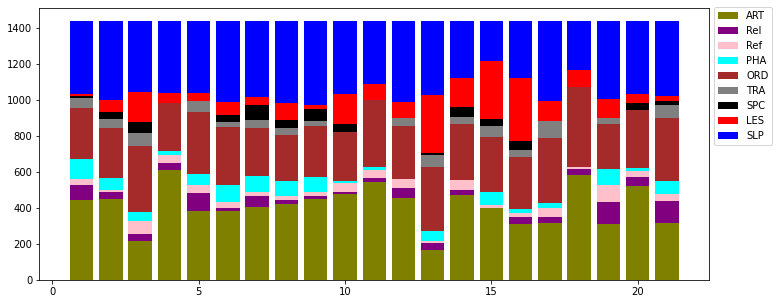

In [48]:
rpt_name ="Routine_rpts_20201125_0110.xlsx"
stackedBarCategories(rpt_name, roll_prd=1, SHOW_STATS=0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving Routine_rpts_20201125_0110.xlsx to Routine_rpts_20201125_0110 (24).xlsx



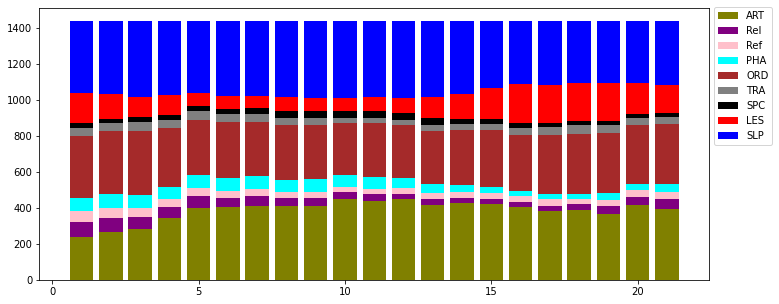

In [49]:
rpt_name ="Routine_rpts_20201125_0110.xlsx"
stackedBarCategories(rpt_name, roll_prd=7, SHOW_STATS=0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving Routine_rpts_20201125_0110.xlsx to Routine_rpts_20201125_0110 (25).xlsx



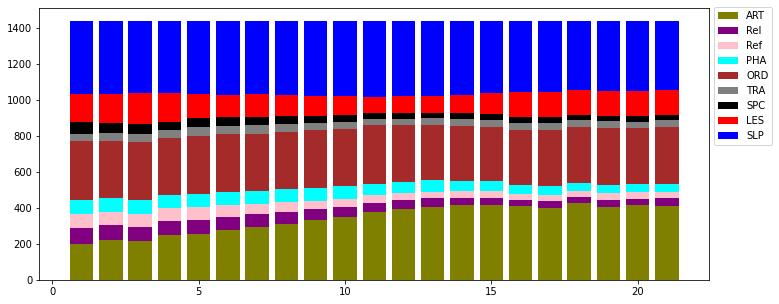

In [50]:
rpt_name ="Routine_rpts_20201125_0110.xlsx"
stackedBarCategories(rpt_name, roll_prd=15, SHOW_STATS=0)